# Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking

In [51]:


import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [52]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [53]:
tf.__version__

'2.12.0'

In [54]:
tf.test.is_built_with_cuda()

False

In [55]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [56]:
X_train.shape

(50000, 32, 32, 3)

In [35]:
y_train.shape

(50000, 1)

In [36]:
def plot_sample(index):
    plt.figure(figsize =(10,1))
    plt.imshow(X_train[index])

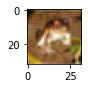

In [37]:
plot_sample(0)

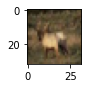

In [38]:
plot_sample(3)

In [39]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [40]:
classes[y_train[3][0]]

'deer'

In [41]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [42]:
y_test.shape

(10000, 1)

In [43]:
y_train.shape

(50000, 1)

In [44]:
# Preprocessing: Scale images

In [45]:

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [46]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [47]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [48]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
# Model building and training
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 165s 104ms/step - loss: 1.8135 - accuracy: 0.3540


In [57]:
# Let's make some predictions
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 16s 29ms/step


3

In [58]:


y_test[0]



array([3], dtype=uint8)

In [59]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [60]:
# Measure training time on a CPU

In [61]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 172s 107ms/step - loss: 1.8101 - accuracy: 0.3558
3min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [63]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 176s 111ms/step - loss: 1.8116 - accuracy: 0.3542
Epoch 2/2
1563/1563 [==============================] - 167s 107ms/step - loss: 1.6228 - accuracy: 0.4265
5min 47s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
